In [112]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns

In [113]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [114]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


0    500
1    268
Name: Outcome, dtype: int64


Text(0.5, 1.0, 'Diabetes Outcome')

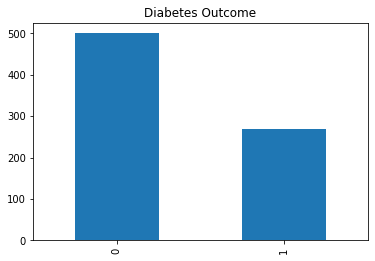

In [115]:
print(df.Outcome.value_counts())
df['Outcome'].value_counts().plot.bar().set_title('Diabetes Outcome')

In [116]:
X = df.iloc[:,0:8]
Y = df.iloc[:,8]
print(X.shape)
print(Y.shape)

(768, 8)
(768,)


In [117]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

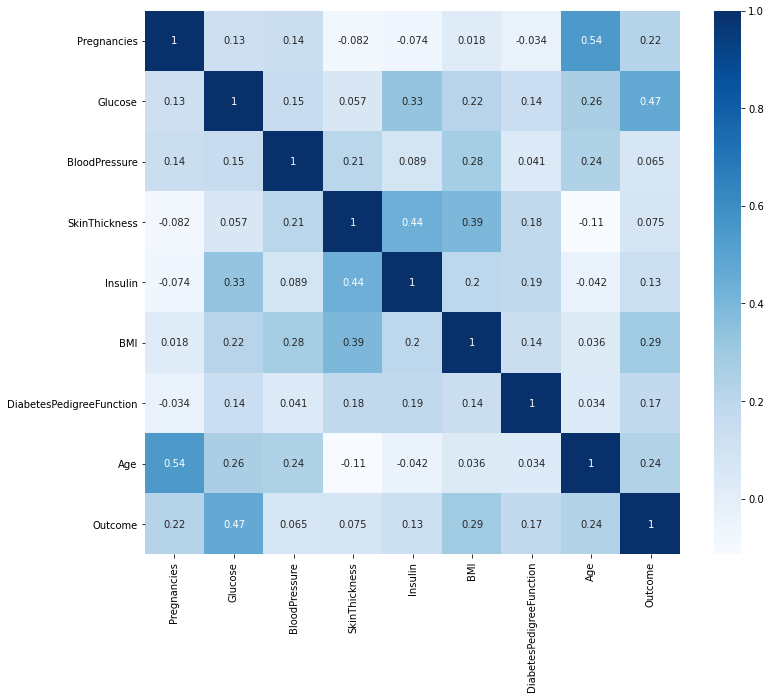

In [118]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

SelectKbest method


In [119]:
test = SelectKBest(score_func=chi2, k=3)
fit = test.fit(X, Y)

In [120]:
np.set_printoptions(precision=4)
print(fit.scores_)

features = fit.transform(X)

[ 111.5197 1411.887    17.6054   53.108  2175.5653  127.6693    5.3927
  181.3037]


In [121]:
X_train, X_test, y_train, y_test = train_test_split(features, Y, test_size=0.21, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

In [122]:
Z = clf.predict(X_test)
accuracy_score(y_test, Z)

0.7469135802469136

In [123]:
std_sca = SS()
X=std_sca.fit_transform(X)
X

array([[ 0.6399,  0.8483,  0.1496, ...,  0.204 ,  0.4685,  1.426 ],
       [-0.8449, -1.1234, -0.1605, ..., -0.6844, -0.3651, -0.1907],
       [ 1.2339,  1.9437, -0.2639, ..., -1.1033,  0.6044, -0.1056],
       ...,
       [ 0.343 ,  0.0033,  0.1496, ..., -0.7352, -0.6852, -0.2758],
       [-0.8449,  0.1598, -0.4707, ..., -0.2402, -0.3711,  1.1707],
       [-0.8449, -0.873 ,  0.0462, ..., -0.2021, -0.4738, -0.8714]])

test using randomforest

In [124]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_test)
print(accuracy_score(y_test, Z))
f1 = f1_score(y_test, Z, average=None)
print(f1)

0.7532467532467533
[0.8081 0.6545]


test using LogisticRegression

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
Z = clf.predict(X_test)
print(accuracy_score(y_test, Z))
f1 = f1_score(y_test, Z, average=None)
print(f1)

0.7532467532467533
[0.8061 0.6607]


In [126]:
corr_matrix=df.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[]


RFE method

as all the preprocessing is already done above we just have to fit model


using LogisticRegression

In [127]:
model = LogisticRegression()
rfe = RFE(model,3)
fitted_model = rfe.fit(X, Y)
print("Num Features: %s" % (fitted_model.n_features_))
print("Selected Features: %s" % (fitted_model.support_))
print("Feature Ranking: %s" % (fitted_model.ranking_))

Num Features: 3
Selected Features: [ True  True False False False  True False False]
Feature Ranking: [1 1 3 6 5 1 2 4]


using RandomForestClassifier

In [128]:
model = RandomForestClassifier()
rfe = RFE(model,3)
fitted_model = rfe.fit(X, Y)
print("Num Features: %s" % (fitted_model.n_features_))
print("Selected Features: %s" % (fitted_model.support_))
print("Feature Ranking: %s" % (fitted_model.ranking_))

Num Features: 3
Selected Features: [False  True False False False  True  True False]
Feature Ranking: [4 1 3 6 5 1 1 2]


In [129]:
corr_matrix=df.corr().abs()
high_corr_var=np.where(corr_matrix>0.7)
high_corr_var=[(corr_matrix.index[x],corr_matrix.columns[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
print(high_corr_var)

[]
